In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/labs/amit/noamsh/repos/sc_clustering')

In [69]:
import scanpy as sc
import pandas as pd
import anndata as ad

from matplotlib import pyplot as plt

In [16]:
from clustering.meta_cell_csv import run_full_pipeline_and_load_meta_cell
from meta_cell_vis_streamlit_funcs import visualize_meta_cell
import config
from clustering.meta_cell_csv import MetaCellResultsColumnsNames

In [60]:
config.DEBUG_MODE = False
adata = run_full_pipeline_and_load_meta_cell()

loading relevant batches:   0%|          | 0/137 [00:00<?, ?batch/s]

2021-07-20 16:37:44.479 INFO    root: Reading , batch id - AB2857
2021-07-20 16:37:44.512 INFO    root: Reading , batch id - AB2858
2021-07-20 16:37:44.517 INFO    root: Reading , batch id - AB2869
2021-07-20 16:37:44.548 INFO    root: Reading , batch id - AB2859
2021-07-20 16:37:44.619 INFO    root: Reading , batch id - AB2870
2021-07-20 16:37:44.652 INFO    root: Reading , batch id - AB2860
2021-07-20 16:37:44.660 INFO    root: Reading , batch id - AB2861
2021-07-20 16:37:44.700 INFO    root: Reading , batch id - AB2871
2021-07-20 16:37:44.700 INFO    root: Reading , batch id - AB2862
2021-07-20 16:37:44.726 INFO    root: Reading , batch id - AB2863
2021-07-20 16:37:44.831 INFO    root: Reading , batch id - AB2872
2021-07-20 16:37:44.843 INFO    root: Reading , batch id - AB2876
2021-07-20 16:37:44.856 INFO    root: Reading , batch id - AB2877
2021-07-20 16:37:44.986 INFO    root: Reading , batch id - AB2880
2021-07-20 16:37:44.986 INFO    root: Reading , batch id - AB2878
2021-07-20

2021-07-20 16:38:04.579 INFO    root: Reading , batch id - AB3913
2021-07-20 16:38:04.740 INFO    root: Reading , batch id - AB3857
2021-07-20 16:38:04.899 INFO    root: Reading , batch id - AB3858
2021-07-20 16:38:05.034 INFO    root: Reading , batch id - AB3859
2021-07-20 16:38:05.188 INFO    root: Reading , batch id - AB4009
2021-07-20 16:38:05.360 INFO    root: Reading , batch id - AB3860
2021-07-20 16:38:05.535 INFO    root: Reading , batch id - AB3861
2021-07-20 16:38:05.717 INFO    root: Reading , batch id - AB3862
2021-07-20 16:38:05.914 INFO    root: Reading , batch id - AB3863
2021-07-20 16:38:06.074 INFO    root: Reading , batch id - AB3864
2021-07-20 16:38:06.235 INFO    root: Reading , batch id - AB4010
2021-07-20 16:38:06.422 INFO    root: Reading , batch id - AB3916


merging to single adata
converting adata to sparse matrix
dropping Mouse columns, some bug with that column


2021-07-20 16:38:55.191 INFO    root: drop bad cells
2021-07-20 16:38:56.678 INFO    root: drop bad genes
Trying to set attribute `.var` of view, copying.
2021-07-20 16:38:57.749 INFO    root: normalized reads
2021-07-20 16:38:58.486 INFO    root: compute genes variation
2021-07-20 16:39:00.056 INFO    root: save procced data in adata.raw
Revieved a view of an AnnData. Making a copy.
Trying to set attribute `.obs` of view, copying.


... storing 'arm.day.batch-mouse' as categorical
... storing 'Mouse/Tumor type' as categorical
... storing 'Sorting date' as categorical
... storing 'Gate' as categorical
... storing 'Notes' as categorical
... storing 'Index beginning time' as categorical
... storing 'Index file' as categorical
... storing 'Sorting Notes' as categorical
... storing 'Experimental Batch' as categorical
... storing 'Batch.Set.ID' as categorical
... storing 'Seq.Batch.ID' as categorical
... storing 'Amp.Batch.ID' as categorical
... storing 'Biological replicate' as categorical
... storing 'Staining panel name' as categorical
... storing 'Institute' as categorical
... storing 'Libraries date' as categorical
... storing 'Cell % per plate' as categorical
... storing 'group' as categorical
... storing 'sub_group' as categorical


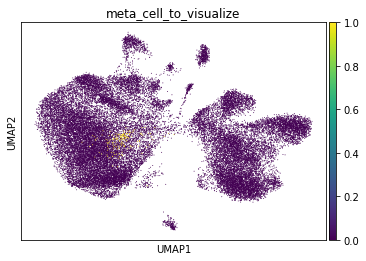

In [61]:
mc = 78
# visualize_meta_cell(adata, mc)
meta_cell = mc
tmp_mc_col_name = "meta_cell_to_visualize"
adata.obs[tmp_mc_col_name] = adata.obs[MetaCellResultsColumnsNames().meta_cell].apply(
    lambda x: 1 if x == meta_cell else 0)
# st.write(sc.pl.umap(adata, color=[tmp_mc_col_name], show=False, return_fig=True)
sc.pl.umap(adata, color=[tmp_mc_col_name])


... storing 'mc.mc' as categorical


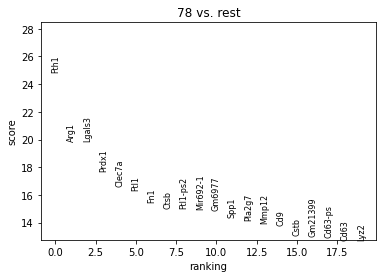

In [93]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# fig, (ax8) = plt.subplots(1, 1)
adata.obs["mc.mc"] = adata.obs["mc.mc"].astype('str')
sc.tl.rank_genes_groups(adata, groupby="mc.mc",groups=[meta_cell], method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=20, save="_fig_1.png")


In [94]:
import imageio
image = imageio.imread("figures/rank_genes_groups_mc.mc_fig_1.png")

In [96]:
type(image)

imageio.core.util.Array